<h1><center>Exercise Sheet 4 Ulzii-Utas.N</center></h1>

# Exercise 1 
Simulation of multi compartment model of passive neurite.

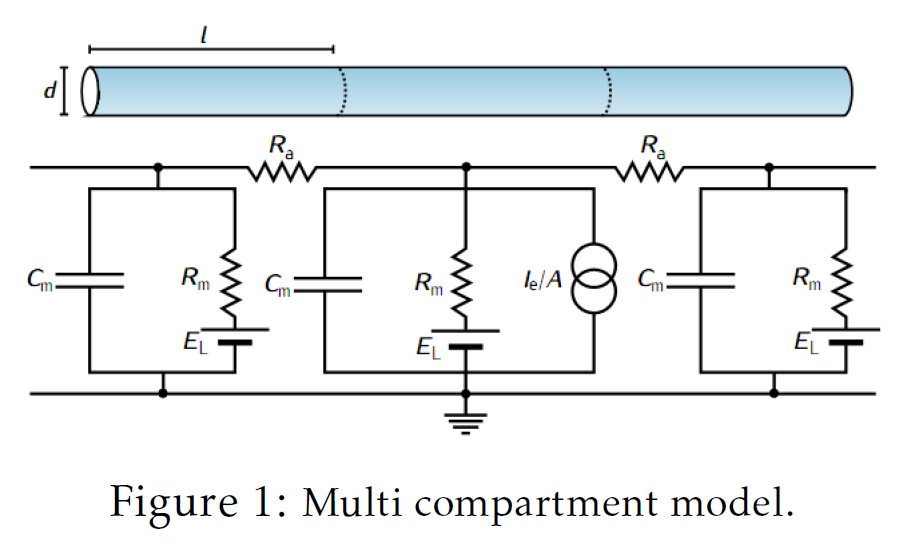

# Exercise 1.1

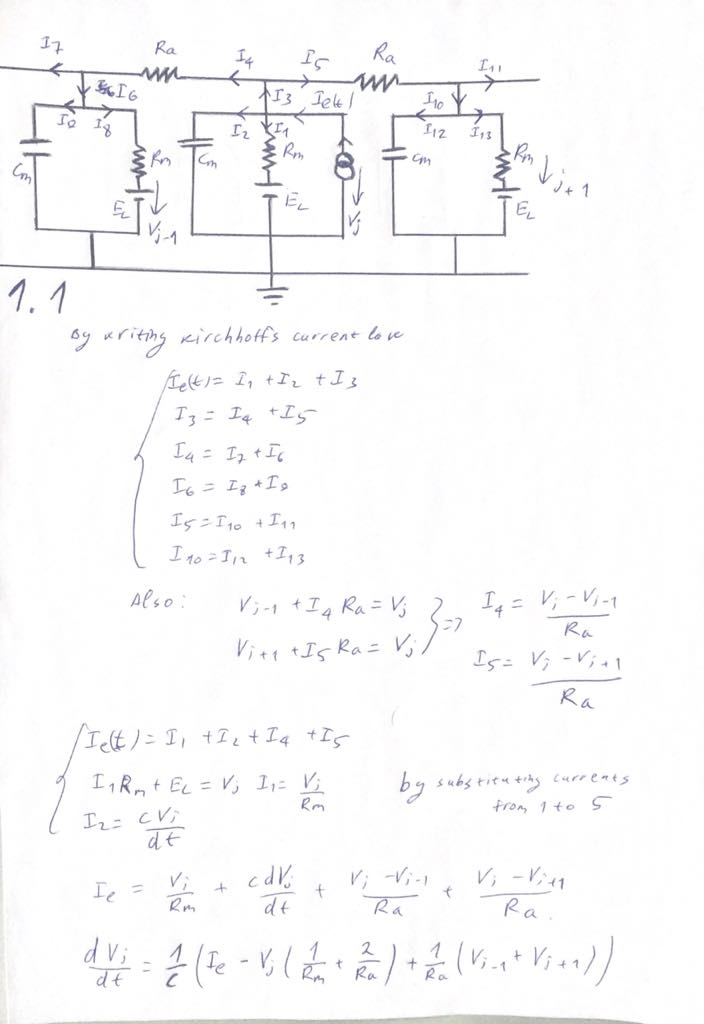

In [1]:
import numpy as np
import mpmath as mpmath
import math as math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

Cm = 62.8e-12
Rm = 1.59e9
Ra = 0.0318e9
El = Em = 0

# Exercise 1.2 

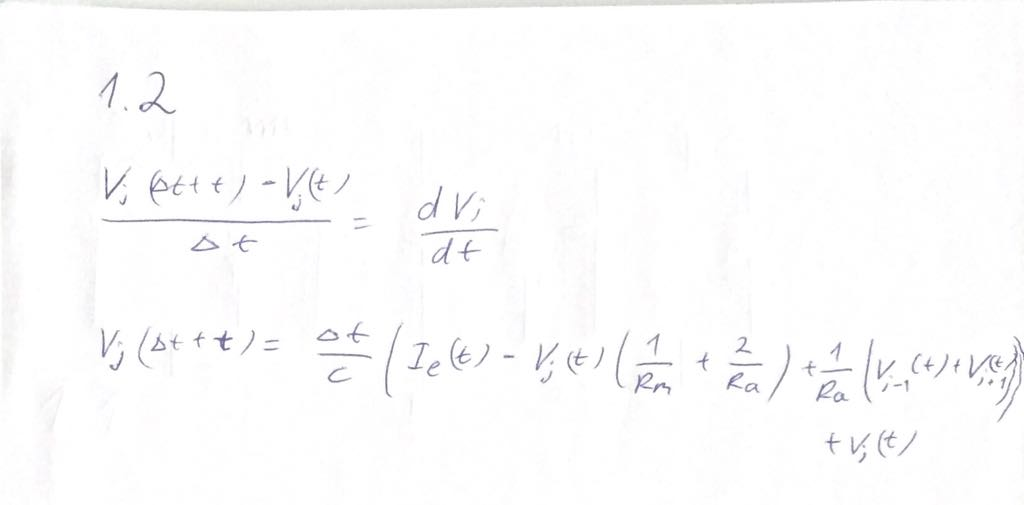

In [2]:
je = 20
je = je - 1
te = 20e-3
I0 = 10e-12
N = 50
deltaT = 0.1e-3

In [3]:
def ie_t_1(t, te, j, I0):
    if t < te or j != je :
        return 0
    if te <= t and j == je:
        return I0

In [4]:
def ie_t_2(t, te, ts, j, I0):
    if t < te or ts <= t or j != je:
        return 0
    if te <= t and t < ts and j == je:
        return I0

In [5]:
def v_j_t(current_type, max_range, deltaT):
    V = np.zeros([max_range, N])
    t_arr = []
    j_arr = np.arange(0, N, 1)
    if current_type == 1:
        for i in range(max_range):
            mult =  float("%0.7f" % (i * deltaT))
            t_arr.append(mult)
            if i == 0:
                for j in range(N):
                    V[i][j] = 0
            else:                
                for j in range(N-1, -1, -1):
                    if j == N-1:
                        V[i][j] = 0
                    elif j == 0:
                        V[i][j] = V[i][j+1]
                    else:              
                        V[i][j] = (ie_t_1(mult, te, j, I0) - V[i-1][j] * (1/Rm + 2/Ra) + (V[i-1][j-1] + V[i-1][j+1])/Ra) * (deltaT/Cm) + V[i-1][j]
                    
    if current_type == 2:
        for i in range(max_range):
            mult =  float("%0.7f" % (i * deltaT))
            t_arr.append(mult)
            if i == 0:
                for j in range(N):
                    V[i][j] = 0
            else:                
                for j in range(N-1, -1, -1):
                    if j == N-1:
                        V[i][j] = 0
                    elif j == 0:
                        V[i][j] = V[i][j+1]
                    else:              
                        V[i][j] = (ie_t_2(mult, te, ts, j, I0) - V[i-1][j] * (1/Rm + 2/Ra) + (V[i-1][j-1] + V[i-1][j+1])/Ra) * (deltaT/Cm) + V[i-1][j]
                    
    t_j_2d = np.zeros([max_range, N])
    for i in range(max_range):    
        for k in range(N):
            t_j_2d[i][k] = t_arr[i]
            
    j_t_2d = np.zeros([max_range, N])
    for i in range(max_range):
        j_t_2d[i] = j_arr
        
    return V, t_j_2d, j_t_2d, t_arr

shape of X = (10000, 50)
shape of Y = (10000, 50)
shape of V = (10000, 50)


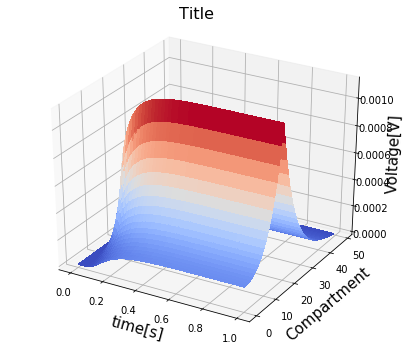

In [6]:
max_range = 10000
V, t, j, t_only = v_j_t(1, max_range, deltaT)

print("shape of X = {}".format(t.shape))
print("shape of Y = {}".format(j.shape))
print("shape of V = {}".format(V.shape))

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
fig.suptitle("Title", fontsize=16, y=0.90)
ax.set_xlabel('time[s]', fontsize=15)
ax.set_ylabel('Compartment', fontsize=15)
ax.set_zlabel('Voltage[V]', fontsize=15)
surf = ax.plot_surface(t, j, V, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()



Compartment 20 has the highest voltage in time more than 20ms, as current is injected in compartment 20. Voltage decreases
more as the it get further away from current injected compartment. 

# Exercise 1.3

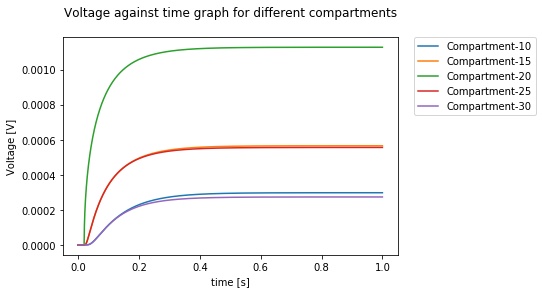

In [7]:

plt.plot(t_only, V.transpose()[9], label='Compartment-10')
plt.plot(t_only, V.transpose()[14], label='Compartment-15')
plt.plot(t_only, V.transpose()[19], label='Compartment-20')
plt.plot(t_only, V.transpose()[24], label='Compartment-25')
plt.plot(t_only, V.transpose()[29], label='Compartment-30')

plt.title(r"Voltage against time graph for different compartments""\n")
plt.xlabel(r'time [s]')
plt.ylabel(r'Voltage [V]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As shown in above graph plot, V(j, infinity) can be seen that as time goes to infinity every compartment saturates 
to certain value and becomes constant for infinity. As for compartments, Compartment Voltage decreases as it gets further away from the input current injected compartment. 

# Exercise 1.4

shape of X = (10000, 50)
shape of Y = (10000, 50)
shape of V = (10000, 50)


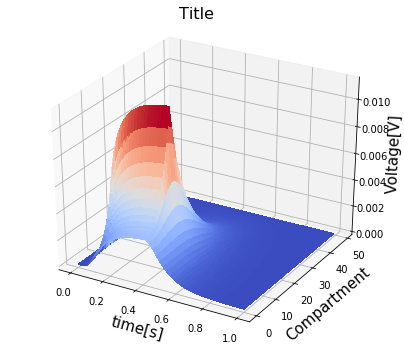

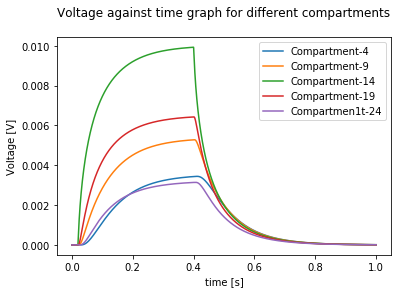

In [8]:
max_range = 10000
I0 = 100e-12
je = 14
te = 20e-3
ts = 400e-3
V2, t2, j2, t2_only = v_j_t(2, max_range, deltaT)

print("shape of X = {}".format(t2.shape))
print("shape of Y = {}".format(j2.shape))
print("shape of V = {}".format(V2.shape))

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
fig.suptitle("Title", fontsize=16, y=0.90)
ax.set_xlabel('time[s]', fontsize=15)
ax.set_ylabel('Compartment', fontsize=15)
ax.set_zlabel('Voltage[V]', fontsize=15)
surf = ax.plot_surface(t2, j2, V2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

plt.plot(t2_only, V2.transpose()[3], label='Compartment-4')
plt.plot(t2_only, V2.transpose()[8], label='Compartment-9')
plt.plot(t2_only, V2.transpose()[13], label='Compartment-14')
plt.plot(t2_only, V2.transpose()[18], label='Compartment-19')
plt.plot(t2_only, V2.transpose()[23], label='Compartmen1t-24')

plt.title(r"Voltage against time graph for different compartments""\n")
plt.xlabel(r'time [s]')
plt.ylabel(r'Voltage [V]')
plt.legend()
plt.show()

Current is injected at 20ms and voltage starts to increase. After 400ms where the current has stopped, the voltage is 
decreasing again until it gets to 0.

# Exercise 2 
Simulation of single compartment Hodgkin-Huxley model of active neurite.

# Exercise 2.1

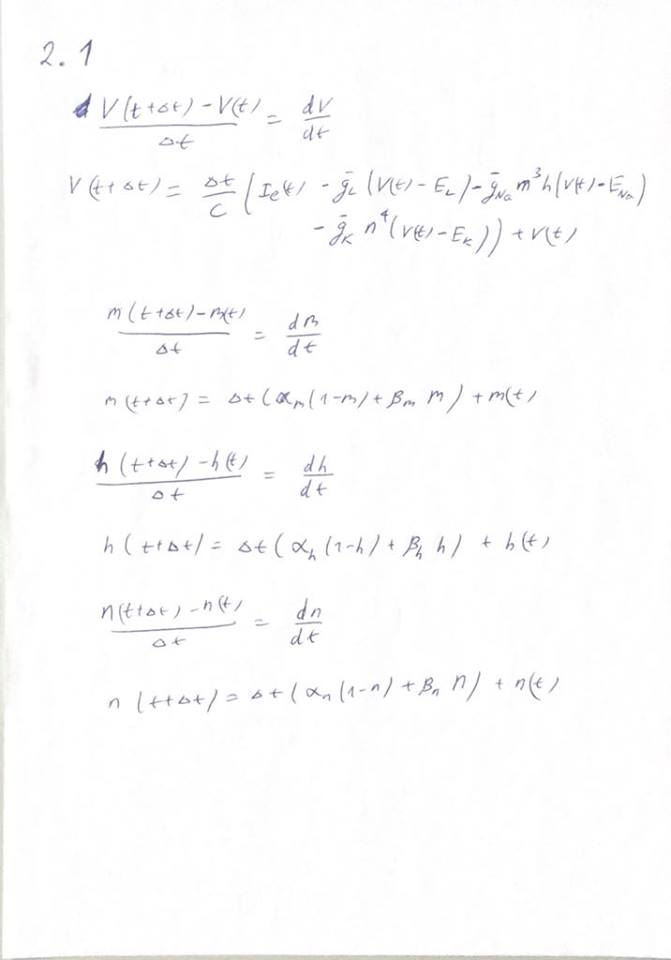

In [9]:
Cm = 1
Ena = 115
Ek = -12
El = 10.6
V0 = 0
gNa = 120
gK = 36
gL = 0.3
deltaT = 0.025

# Exercise 2.2

In [10]:
def alpha_m(V):
    if V == 25:
        return 1
    else:
        return 0.1 * ((V - 25)/(1 - math.exp(-(V-25)/10)))
def beta_m(V):
    return 4 * math.exp(-V/18)

In [11]:
def alpha_h(V):
    return 0.07 * math.exp(-V/20)
def beta_h(V):
    return 1/(1 + math.exp(-(V - 30)/10))

In [12]:
def alpha_n(V):
    if V == 10:
        return 0.1
    else:
        return 0.01 * ((V - 10)/(1 - math.exp(-(V-10)/10)))
def beta_n(V):
    return 0.125 * math.exp(-V/80)

In [13]:
def ie_t(t, te, ts, I0):
    if t < te or ts <= t:
        return 0
    if te <= t and t < ts:
        return I0

0.05292657528609837 0.5973113762398123 0.31734235189148685


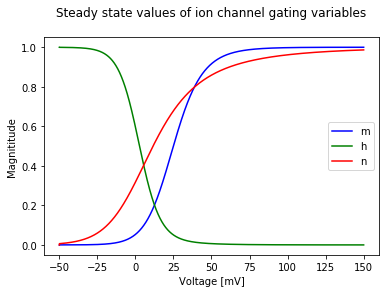

In [14]:
V_init = -50
V_fini = 150
V_step = 0.0001
V_step_for_50 = int(50/V_step)
V_steady_state = []
m_0 = 0
n_0 = 0
h_0 = 0

m = np.zeros(int(200/V_step))
h = np.zeros(int(200/V_step))
n = np.zeros(int(200/V_step))

for i in range((int(200/V_step))):
    if i == 0:
        V_steady_state.append(-50)
        m[i] = 0
        n[i] = 0
        h[i] = 1
    else:
        add =  float("%0.7f" % (V_steady_state[i-1] + V_step))
        V_steady_state.append(add)
        m[i] = (alpha_m(V_steady_state[i-1]) * (1 - m[i-1]) - beta_m(V_steady_state[i-1]) * m[i-1]) * deltaT + m[i-1]
        h[i] = (alpha_h(V_steady_state[i-1]) * (1 - h[i-1]) - beta_h(V_steady_state[i-1]) * h[i-1]) * deltaT + h[i-1]
        n[i] = (alpha_n(V_steady_state[i-1]) * (1 - n[i-1]) - beta_n(V_steady_state[i-1]) * n[i-1]) * deltaT + n[i-1] 
        
        if V_steady_state[i] == 0:
            m_0 = m[i]
            h_0 = h[i]
            n_0 = n[i]
            
print(m_0, h_0, n_0)

plt.plot(V_steady_state, m, label='m', color = 'blue')
plt.plot(V_steady_state, h, label='h', color = 'green')
plt.plot(V_steady_state, n, label='n', color = 'red')

plt.title(r"Steady state values of ion channel gating variables""\n")
plt.xlabel(r'Voltage [mV]')
plt.ylabel(r'Magnititude')
plt.legend()
plt.show()

In [15]:
def hh_vt(I0, max_range, deltaT, m_0, h_0, n_0):
    V = np.zeros(max_range)
    m = np.zeros(max_range)
    h = np.zeros(max_range)
    n = np.zeros(max_range)
    t = []
    for i in range(max_range):
        mult =  float("%0.7f" % (i * deltaT))
        t.append(mult)
        if i == 0:
            V[i] = 0            
            m[i] = m_0         
            h[i] = h_0         
            n[i] = n_0
        else:         
            V[i] = ((ie_t(t[i-1], te, ts, I0)
                     - gL * (V[i-1] - El) 
                     - gNa * m[i-1]**(3) * h[i-1] * (V[i-1] - Ena) 
                     - gK * n[i-1]**(4) * (V[i-1] - Ek)) * (deltaT/Cm) + V[i-1])
    
            m[i] = (alpha_m(V[i-1]) * (1 - m[i-1]) - beta_m(V[i-1]) * m[i-1]) * deltaT + m[i-1]
            h[i] = (alpha_h(V[i-1]) * (1 - h[i-1]) - beta_h(V[i-1]) * h[i-1]) * deltaT + h[i-1]
            n[i] = (alpha_n(V[i-1]) * (1 - n[i-1]) - beta_n(V[i-1]) * n[i-1]) * deltaT + n[i-1]
            
            
    return V, t

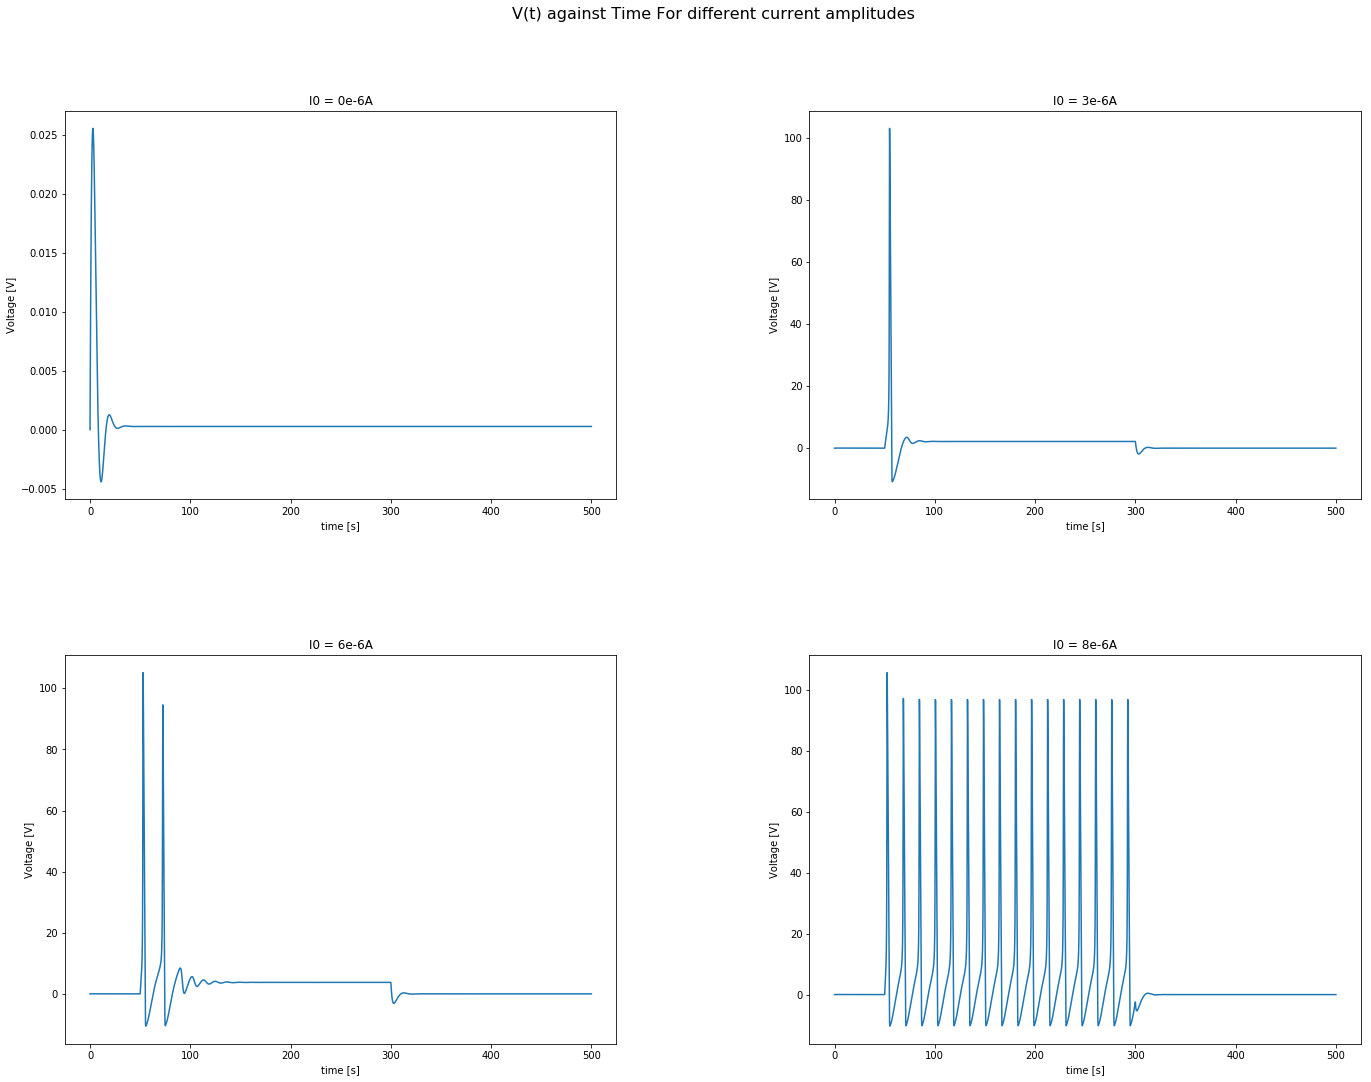

In [16]:
te = 50
ts = 300
I0_array = [0, 3, 6, 8]
max_range = 20000

V = np.zeros([len(I0_array), max_range])
t = []

plt.figure(figsize=(20, 16))
plt.suptitle('V(t) against Time For different current amplitudes', fontsize=16)

for i in range(len(I0_array)):
    V[i], t = hh_vt(I0_array[i], max_range, deltaT, m_0, h_0, n_0)
    
    plt.subplot(2,2,i+1)
    plt.plot(t, V[i])
    plt.title(r'I0 = {}e-6A'.format(I0_array[i]))
    plt.xlabel(r'time [s]')
    plt.ylabel(r'Voltage [V]')    
#     plt.ylim(-20, 120)

plt.subplots_adjust(top=0.89, bottom=0.08, left=0.05, right=0.95, hspace=0.40, wspace=0.35)
plt.show()

    

# Exercise 2.3

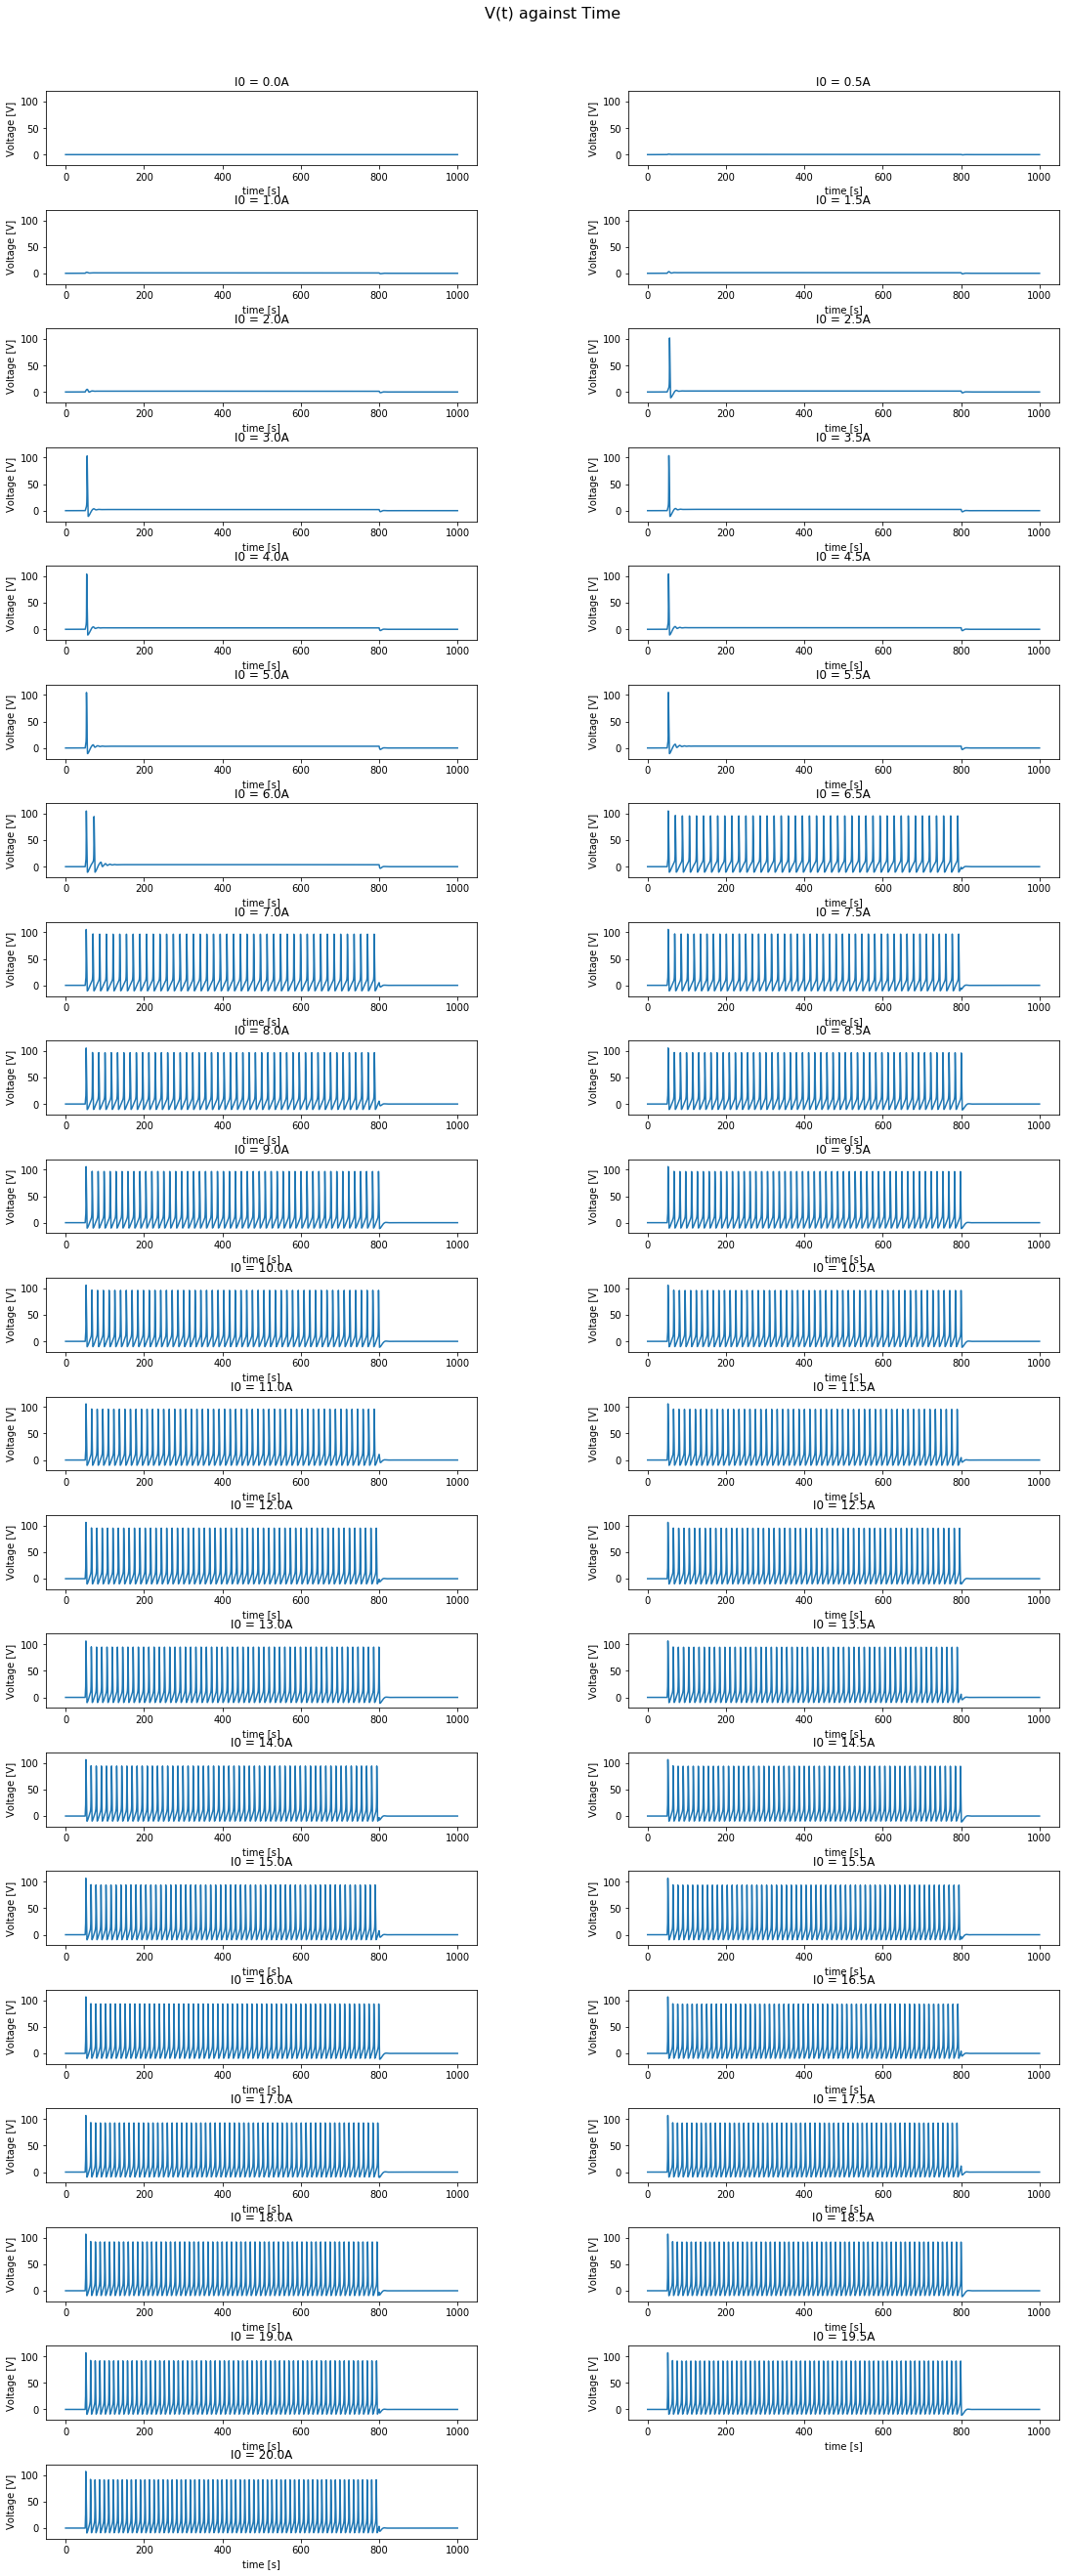

In [17]:
ts = 800
I0 = 0
I0_max = 20
I0_step = 0.5
steps = int(I0_max/I0_step) + 1

max_range = 40000
V = np.zeros([steps, max_range])
m = np.zeros([steps, max_range])
h = np.zeros([steps, max_range])
n = np.zeros([steps, max_range])
t = []

plt.figure(figsize=(16, 40))
plt.suptitle('V(t) against Time', fontsize=16)

threshold = 0
current_amp = []
for i in range(steps):    
    I0 = i * I0_step
    current_amp.append(I0)
    
    V[i], t = hh_vt(I0, max_range, deltaT, m_0, h_0, n_0)
    
    max_value = max(V[i][2400:32000])
    if max_value > threshold:
        threshold = max_value
    
    plt.subplot(21,2,i+1)
    plt.plot(t, V[i])
    plt.title(r'I0 = {}A'.format(I0))
    plt.xlabel(r'time [s]')
    plt.ylabel(r'Voltage [V]')
    plt.ylim(-20, 120)

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.05, right=0.95, hspace=0.60, wspace=0.35)
plt.show()

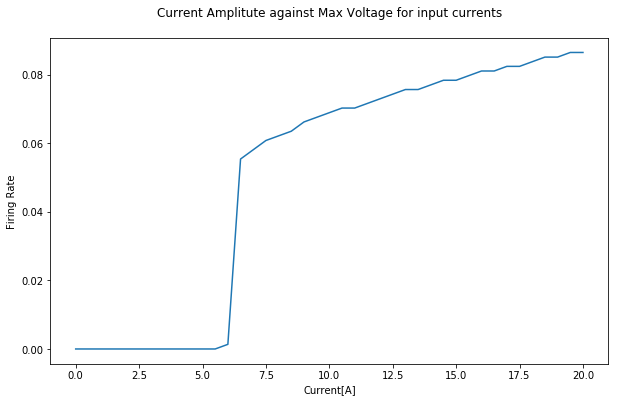

In [18]:
count_threshold_bypass = 0
firing_rate = []

for p in range(steps):
    o = 2400
    while o < 32000:
        if V[p][o] > (threshold * (1/2)):
            bool_threshold = False
            for k in range(o, 32000):     
                if V[p][k] > (threshold * (2/3)) and bool_threshold == False:  
                    count_threshold_bypass = count_threshold_bypass + 1
                    bool_threshold = True      
                if V[p][k] < (threshold * (1/2)) or V[p][k] <= 0 or k == 32000 - 1:    
                    o = k
                    break
        o += 1        
    firing_rate.append(count_threshold_bypass/740)
    count_threshold_bypass = 0
plt.figure(figsize=(10, 6))
plt.plot(current_amp, firing_rate)

plt.title(r"Current Amplitute against Max Voltage for input currents""\n")
plt.xlabel(r'Current[A]')
plt.ylabel(r'Firing Rate')
plt.show()